In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline

In [2]:
version = 7

In [3]:
records_iq = pd.read_csv(
    './generated/1-features-iq.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date').interpolate()
records_sj = pd.read_csv(
    './generated/1-features-sj.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date').interpolate()

In [4]:
training_targets_iq = pd.read_csv(
    './generated/1-labels-train-iq.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date')
training_targets_sj = pd.read_csv(
    './generated/1-labels-train-sj.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date')

In [5]:
stl_dec_iq = pd.read_csv(
    './generated/2-time-dec-features-iq.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date')
stl_dec_sj = pd.read_csv(
    './generated/2-time-dec-features-sj.csv', 
    parse_dates=['week_start_date'], 
    index_col='week_start_date')

In [6]:
records_train_iq = pd.concat([records_iq.head(520), training_targets_iq[['total_cases']]], axis=1)
records_train_sj = pd.concat([records_sj.head(936), training_targets_sj[['total_cases']]], axis=1)

stl_dec_train_iq = pd.concat([stl_dec_iq.head(520), training_targets_iq[['total_cases']]], axis=1)
stl_dec_train_sj = pd.concat([stl_dec_sj.head(936), training_targets_sj[['total_cases']]], axis=1)
stl_dec_test_iq = stl_dec_iq.tail(156)
stl_dec_test_sj = stl_dec_sj.tail(260)

In [7]:
def lagged_corr(df, skip_col, label_col, lag):
    lcorr = pd.concat([
        df.drop(skip_col, axis=1).shift(lag),
        df[[label_col]]], axis=1).corr()

    lcorr_label = lcorr[label_col].drop(label_col)

    return lcorr_label

In [8]:
records_multi_lagged_corr_iq = pd.DataFrame(
    {i: lagged_corr(records_train_iq, ['total_cases', 'weekofyear'], 'total_cases', i) for i in range(25)}
).T

Text(0.5,1,'Iquitos feature/label correlations')

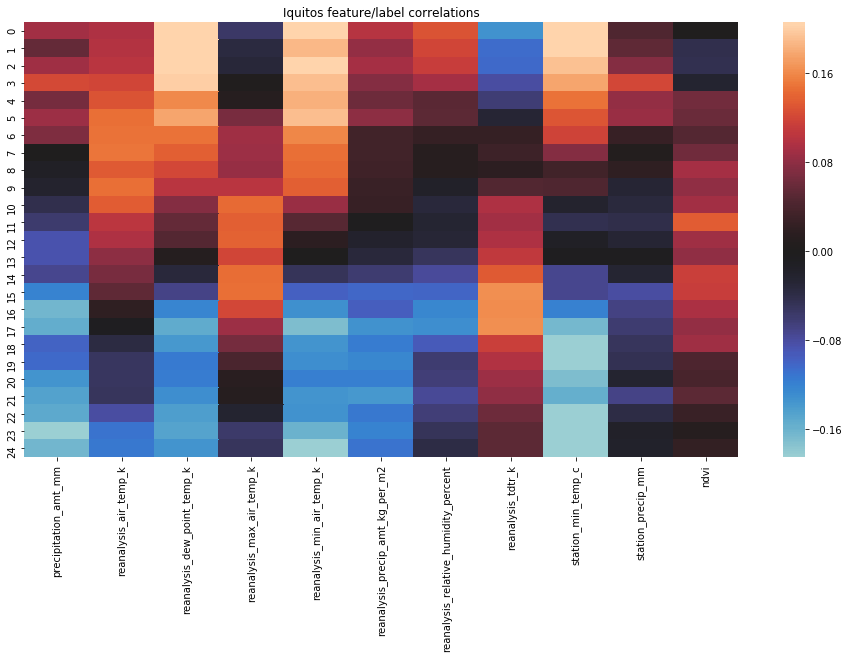

In [9]:
plt.figure(figsize=(16, 8))
sns.heatmap(records_multi_lagged_corr_iq, robust=True, center=0)
plt.title('Iquitos feature/label correlations')

In [10]:
records_multi_lagged_corr_sj = pd.DataFrame(
    {i: lagged_corr(records_train_sj, ['total_cases', 'weekofyear'], 'total_cases', i) for i in range(25)}
).T

Text(0.5,1,'San Juan feature/label correlations')

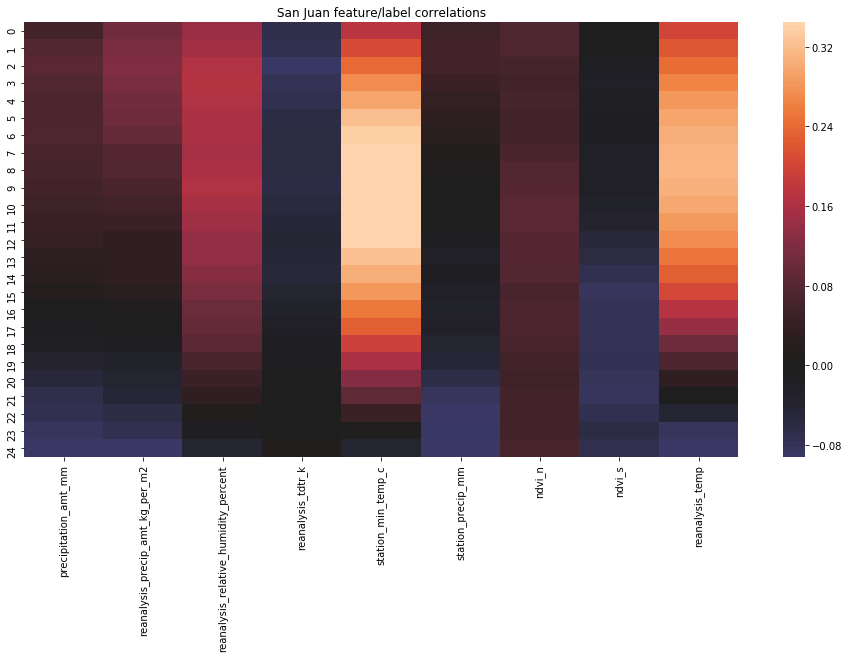

In [11]:
plt.figure(figsize=(16, 8))
sns.heatmap(records_multi_lagged_corr_sj, robust=True, center=0)
plt.title('San Juan feature/label correlations')

In [12]:
stl_dec_multi_lagged_corr_iq = pd.DataFrame(
    {i: lagged_corr(stl_dec_train_iq, ['total_cases'], 'total_cases', i) for i in range(25)}
).T

Text(0.5,1,'Iquitos STLdec/label correlations')

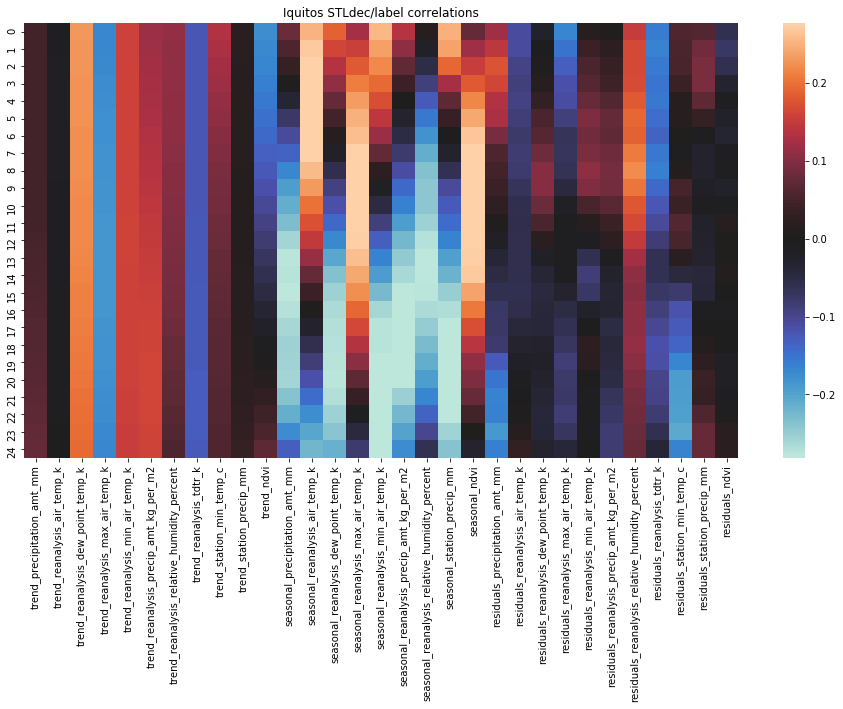

In [13]:
plt.figure(figsize=(16, 8))
sns.heatmap(stl_dec_multi_lagged_corr_iq, robust=True, center=0)
plt.title('Iquitos STLdec/label correlations')

In [14]:
stl_dec_multi_lagged_corr_sj = pd.DataFrame(
    {i: lagged_corr(stl_dec_train_sj, ['total_cases'], 'total_cases', i) for i in range(25)}
).T

Text(0.5,1,'San Juan STLdec/label correlations')

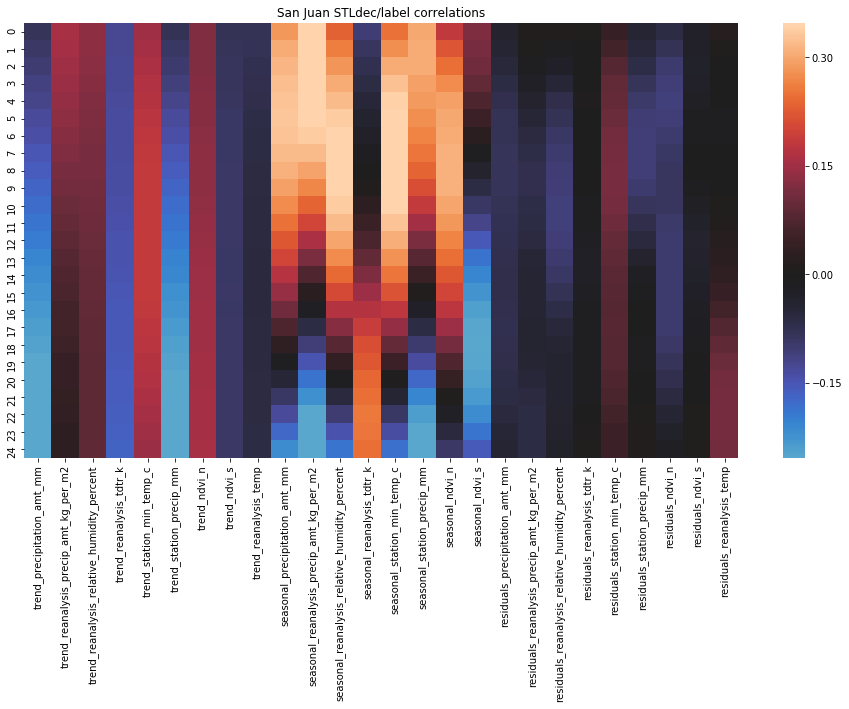

In [15]:
plt.figure(figsize=(16, 8))
sns.heatmap(stl_dec_multi_lagged_corr_sj, robust=True, center=0)
plt.title('San Juan STLdec/label correlations')

In [16]:
records_ml_corr_max_iq = pd.concat({
    'max_iq': records_multi_lagged_corr_iq.max(),
    'min_iq': records_multi_lagged_corr_iq.min(),
}, axis=1)

records_ml_corr_argmax_iq = pd.concat({
    'argmax_iq': records_multi_lagged_corr_iq.idxmax(), 
    'argmin_iq': records_multi_lagged_corr_iq.idxmin(), 
}, axis=1)

records_ml_corr_max_sj = pd.concat({
    'max_sj':records_multi_lagged_corr_sj.max(),
    'min_sj': records_multi_lagged_corr_sj.min(),
}, axis=1)

records_ml_corr_argmax_sj = pd.concat({
    'argmax_sj': records_multi_lagged_corr_sj.idxmax(),  
    'argmin_sj': records_multi_lagged_corr_sj.idxmin(), 
}, axis=1)

pd.concat([records_ml_corr_argmax_iq, records_ml_corr_argmax_sj, records_ml_corr_max_iq, 
           records_ml_corr_max_sj], axis=1, sort=True)

,argmax_iq,argmin_iq,argmax_sj,argmin_sj,max_iq,min_iq,max_sj,min_sj
ndvi,11.0,2.0,NaN,NaN,0.134266,-0.043456,NaN,NaN
ndvi_n,NaN,NaN,11.0,20.0,NaN,NaN,0.085653,0.055127
ndvi_s,NaN,NaN,1.0,15.0,NaN,NaN,-0.000865,-0.083725
precipitation_amt_mm,3.0,23.0,2.0,24.0,0.123252,-0.186624,0.084071,-0.105622
reanalysis_air_temp_k,7.0,24.0,NaN,NaN,0.150917,-0.112790,NaN,NaN
reanalysis_dew_point_temp_k,0.0,17.0,NaN,NaN,0.229183,-0.153087,NaN,NaN
reanalysis_max_air_temp_k,15.0,23.0,NaN,NaN,0.146816,-0.056224,NaN,NaN
reanalysis_min_air_temp_k,0.0,24.0,NaN,NaN,0.211679,-0.184034,NaN,NaN
reanalysis_precip_amt_kg_per_m2,0.0,21.0,2.0,24.0,0.101150,-0.137581,0.123420,-0.093968
reanalysis_relative_humidity_percent,0.0,17.0,3.0,24.0,0.129486,-0.129820,0.167323,-0.040521


In [17]:
stl_dec_ml_corr_max_iq = pd.concat({
    'max_iq': stl_dec_multi_lagged_corr_iq.max(),
    'min_iq': stl_dec_multi_lagged_corr_iq.min(),
}, axis=1, sort=True)

stl_dec_ml_corr_argmax_iq = pd.concat({
    'argmax_iq': stl_dec_multi_lagged_corr_iq.idxmax(), 
    'argmin_iq': stl_dec_multi_lagged_corr_iq.idxmin(), 
}, axis=1, sort=True)

stl_dec_ml_corr_max_sj = pd.concat({
    'max_sj': stl_dec_multi_lagged_corr_sj.max(),
    'min_sj': stl_dec_multi_lagged_corr_sj.min()
}, axis=1, sort=True)

stl_dec_ml_corr_argmax_sj = pd.concat({
    'argmax_sj': stl_dec_multi_lagged_corr_sj.idxmax(), 
    'argmin_sj': stl_dec_multi_lagged_corr_sj.idxmin(), 
}, axis=1, sort=True)


pd.concat([stl_dec_ml_corr_argmax_iq, stl_dec_ml_corr_argmax_iq, stl_dec_ml_corr_max_sj, 
           stl_dec_ml_corr_max_sj], axis=1, sort=True)

,argmax_iq,argmin_iq,argmax_iq,argmin_iq,max_sj,min_sj,max_sj,min_sj
residuals_ndvi,24.0,1.0,24.0,1.0,NaN,NaN,NaN,NaN
residuals_ndvi_n,NaN,NaN,NaN,NaN,-0.017063,-0.108654,-0.017063,-0.108654
residuals_ndvi_s,NaN,NaN,NaN,NaN,0.007867,-0.035314,0.007867,-0.035314
residuals_precipitation_amt_mm,2.0,23.0,2.0,23.0,-0.036469,-0.084337,-0.036469,-0.084337
residuals_reanalysis_air_temp_k,24.0,0.0,24.0,0.0,NaN,NaN,NaN,NaN
residuals_reanalysis_dew_point_temp_k,9.0,15.0,9.0,15.0,NaN,NaN,NaN,NaN
residuals_reanalysis_max_air_temp_k,12.0,0.0,12.0,0.0,NaN,NaN,NaN,NaN
residuals_reanalysis_min_air_temp_k,8.0,14.0,8.0,14.0,NaN,NaN,NaN,NaN
residuals_reanalysis_precip_amt_kg_per_m2,8.0,24.0,8.0,24.0,0.009826,-0.071336,0.009826,-0.071336
residuals_reanalysis_relative_humidity_percent,8.0,24.0,8.0,24.0,0.012766,-0.110132,0.012766,-0.110132


Text(0.5,1,'Maximum lagged cross correlation iq')

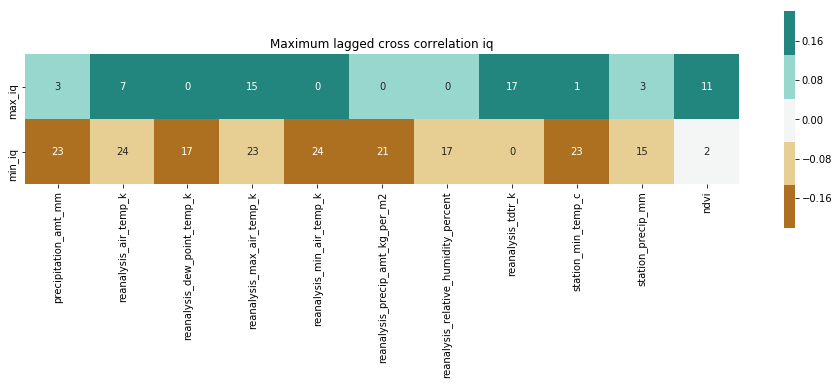

In [18]:
plt.figure(figsize=(16, 4))
sns.heatmap(records_ml_corr_max_iq.T, 
            cmap=sns.color_palette('BrBG', n_colors=5), 
            robust=True, 
            square=True, 
            center=0,
            annot=records_ml_corr_argmax_iq.T)
plt.title('Maximum lagged cross correlation iq')

Text(0.5,1,'Maximum lagged cross correlation sj')

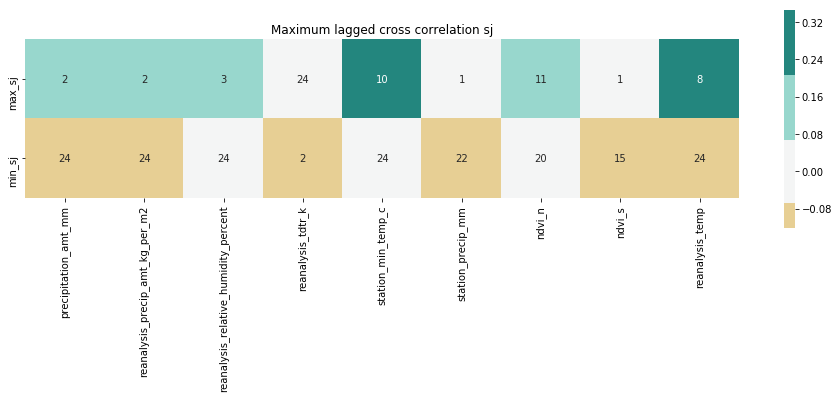

In [19]:
plt.figure(figsize=(16, 4))
sns.heatmap(records_ml_corr_max_sj.T, 
            cmap=sns.color_palette('BrBG', n_colors=5), 
            robust=True, 
            square=True, 
            center=0,
            annot=records_ml_corr_argmax_sj.T)
plt.title('Maximum lagged cross correlation sj')

Text(0.5,1,'Maximum lagged cross correlation for STL decomposed seasonal data iq')

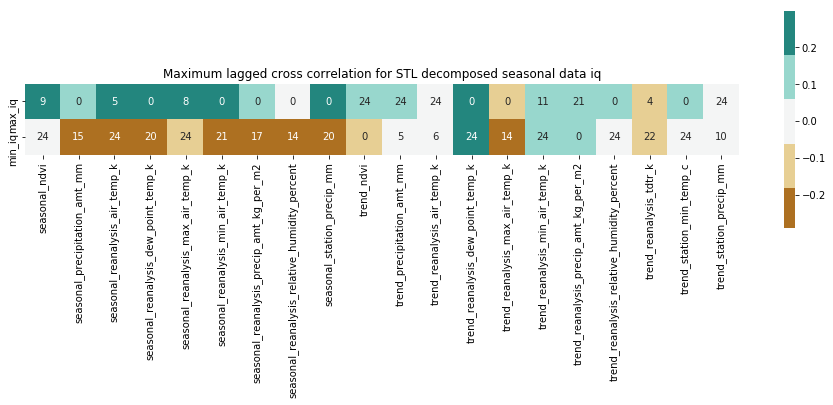

In [20]:
plt.figure(figsize=(16, 4))
stl_dec_ml_corr_max_filter_iq = list(map(
    lambda s: s.startswith('seasonal') or s.startswith('trend'), 
    stl_dec_ml_corr_max_iq.index.values))
sns.heatmap(
    stl_dec_ml_corr_max_iq[stl_dec_ml_corr_max_filter_iq].T, 
    cmap=sns.color_palette('BrBG', n_colors=5), 
    robust=True, 
    square=True, 
    center=0,
    annot=stl_dec_ml_corr_argmax_iq[stl_dec_ml_corr_max_filter_iq].T)
plt.title('Maximum lagged cross correlation for STL decomposed seasonal data iq')

Text(0.5,1,'Maximum lagged cross correlation for STL decomposed seasonal data sj')

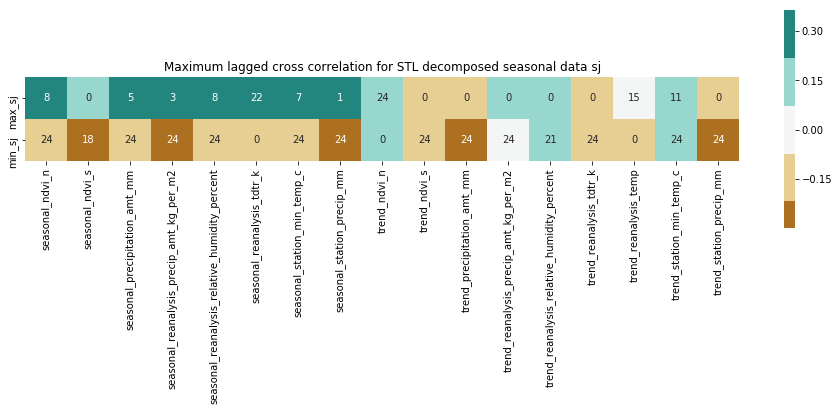

In [21]:
plt.figure(figsize=(16, 4))
stl_dec_ml_corr_max_filter_sj = list(map(
    lambda s: s.startswith('seasonal') or s.startswith('trend'), 
    stl_dec_ml_corr_max_sj.index.values))
sns.heatmap(
    stl_dec_ml_corr_max_sj[stl_dec_ml_corr_max_filter_sj].T, 
    cmap=sns.color_palette('BrBG', n_colors=5), 
    robust=True, 
    square=True, 
    center=0,
    annot=stl_dec_ml_corr_argmax_sj[stl_dec_ml_corr_max_filter_sj].T)
plt.title('Maximum lagged cross correlation for STL decomposed seasonal data sj')

In [22]:
def feature_autoselect(corr_max, corr_argmax, city, ntake, max_lag):
    pointer_min = 0
    pointer_max = 0
    f_selected = []
    f_lags = []
    f_count = len(corr_max)
    corr_abs = corr_max.abs()
    fc_max = corr_abs['max_' + city].sort_values(ascending=False)
    fc_min = corr_abs['min_' + city].sort_values(ascending=False)
    ca_max = corr_argmax['argmax_' + city]
    ca_min = corr_argmax['argmin_' + city]
    
    while True:
        if len(f_selected) >= ntake: break
        if pointer_max >= f_count and pointer_min >= f_count: 
            break
        elif pointer_max >= f_count and pointer_min < f_count:
            if (fc_min.index.values[pointer_min] not in f_selected) \
            and (ca_min[fc_min.index[pointer_min]] <= max_lag):
                f_selected.append(fc_min.index.values[pointer_min])
                f_lags.append(ca_min[fc_min.index[pointer_min]])
            
            pointer_min += 1
        elif pointer_min >= f_count and pointer_max < f_count:
            if (fc_max.index.values[pointer_max] not in f_selected) \
            and (ca_max[fc_max.index[pointer_max]] <= max_lag):
                f_selected.append(fc_max.index.values[pointer_max])
                f_lags.append(ca_max[fc_max.index[pointer_max]])
                
            pointer_max += 1
        else:
            if fc_min[pointer_min] > fc_max[pointer_max]:
                if (fc_min.index.values[pointer_min] not in f_selected) \
                and (ca_min[fc_min.index[pointer_min]] <= max_lag):
                    f_selected.append(fc_min.index.values[pointer_min])
                    f_lags.append(ca_min[fc_min.index[pointer_min]])
                pointer_min += 1
            else:
                if (fc_max.index.values[pointer_max] not in f_selected) \
                and (ca_max[fc_max.index[pointer_max]] <= max_lag):
                    f_selected.append(fc_max.index.values[pointer_max])
                    f_lags.append(ca_max[fc_max.index[pointer_max]])
                pointer_max += 1
    
    return dict(zip(f_selected, f_lags))

In [23]:
def select_lag(source_df, select_lag):
    stl_ref_iq = pd.DataFrame(index=source_df.index)
    for k, v in select_lag.items():
        stl_ref_iq[k] = source_df[k].shift(v)

    return stl_ref_iq

In [24]:
selected_f_stl_iq = feature_autoselect(corr_max=stl_dec_ml_corr_max_iq, 
                                       corr_argmax=stl_dec_ml_corr_argmax_iq, city='iq', max_lag=18, ntake=15)
selected_f_stl_sj = feature_autoselect(corr_max=stl_dec_ml_corr_max_sj, 
                                       corr_argmax=stl_dec_ml_corr_argmax_sj, city='sj', max_lag=18, ntake=15)

In [25]:
selected_f_stl_iq

{'seasonal_ndvi': 9,
 'seasonal_reanalysis_air_temp_k': 5,
 'seasonal_reanalysis_precip_amt_kg_per_m2': 17,
 'seasonal_reanalysis_max_air_temp_k': 8,
 'seasonal_reanalysis_relative_humidity_percent': 14,
 'seasonal_precipitation_amt_mm': 15,
 'seasonal_reanalysis_min_air_temp_k': 0,
 'seasonal_station_precip_mm': 0,
 'trend_reanalysis_dew_point_temp_k': 0,
 'residuals_reanalysis_relative_humidity_percent': 8,
 'seasonal_reanalysis_dew_point_temp_k': 0,
 'trend_reanalysis_max_air_temp_k': 14,
 'trend_ndvi': 0,
 'residuals_precipitation_amt_mm': 2,
 'residuals_reanalysis_max_air_temp_k': 0}

In [26]:
selected_f_stl_sj

{'seasonal_station_min_temp_c': 7,
 'seasonal_reanalysis_precip_amt_kg_per_m2': 3,
 'seasonal_reanalysis_relative_humidity_percent': 8,
 'seasonal_precipitation_amt_mm': 5,
 'seasonal_ndvi_n': 8,
 'seasonal_station_precip_mm': 1,
 'seasonal_ndvi_s': 18,
 'trend_station_min_temp_c': 11,
 'trend_reanalysis_precip_amt_kg_per_m2': 0,
 'trend_reanalysis_relative_humidity_percent': 0,
 'trend_reanalysis_tdtr_k': 0,
 'trend_ndvi_n': 0,
 'residuals_station_min_temp_c': 8,
 'residuals_reanalysis_relative_humidity_percent': 10,
 'residuals_ndvi_n': 4}

In [27]:
refined_stl_iq = select_lag(stl_dec_iq, selected_f_stl_iq)
refined_stl_sj = select_lag(stl_dec_sj, selected_f_stl_sj)

In [28]:
features_1_train_iq = pd.concat([
    refined_stl_iq.head(520), records_iq.head(520)[['weekofyear']], training_targets_iq[['total_cases']]
], axis=1).dropna()
features_1_train_sj = pd.concat([
    refined_stl_sj.head(936), records_sj.head(936)[['weekofyear']], training_targets_sj[['total_cases']]
], axis=1).dropna()
features_1_test_iq = pd.concat([refined_stl_iq.tail(156), records_iq.tail(156)[['weekofyear']]], axis=1)
features_1_test_sj = pd.concat([refined_stl_sj.tail(260), records_sj.tail(260)[['weekofyear']]], axis=1)

In [29]:
features_1_train_iq.to_csv('./generated/3-refined-' + str(version) + '-train-iq.csv')
features_1_train_sj.to_csv('./generated/3-refined-' + str(version) + '-train-sj.csv')
features_1_test_iq.to_csv('./generated/3-refined-' + str(version) + '-test-iq.csv')
features_1_test_sj.to_csv('./generated/3-refined-' + str(version) + '-test-sj.csv')

In [30]:
selected_f_org_iq = feature_autoselect(corr_max=records_ml_corr_max_iq, 
                                       corr_argmax=records_ml_corr_argmax_iq, city='iq', max_lag=18, ntake=4)
selected_f_org_sj = feature_autoselect(corr_max=records_ml_corr_max_sj, 
                                       corr_argmax=records_ml_corr_argmax_sj, city='sj', max_lag=18, ntake=4)

In [31]:
selected_f_org_iq

{'reanalysis_dew_point_temp_k': 0,
 'reanalysis_min_air_temp_k': 0,
 'station_min_temp_c': 1,
 'reanalysis_tdtr_k': 17}

In [32]:
selected_f_org_sj

{'station_min_temp_c': 10,
 'reanalysis_temp': 8,
 'reanalysis_relative_humidity_percent': 3,
 'reanalysis_precip_amt_kg_per_m2': 2}

In [33]:
refined_org_iq = select_lag(records_iq, selected_f_org_iq)
refined_org_sj = select_lag(records_sj, selected_f_org_sj)

In [34]:
features_0_train_iq = pd.concat([
    refined_org_iq.head(520), records_iq.head(520)[['weekofyear']], training_targets_iq[['total_cases']]
], axis=1).dropna()
features_0_train_sj = pd.concat([
    refined_org_sj.head(936), records_sj.head(936)[['weekofyear']], training_targets_sj[['total_cases']]
], axis=1).dropna()
features_0_test_iq = pd.concat([refined_org_iq.tail(156), records_iq.tail(156)[['weekofyear']]], axis=1)
features_0_test_sj = pd.concat([refined_org_sj.tail(260), records_sj.tail(260)[['weekofyear']]], axis=1)

In [35]:
features_0_train_iq.to_csv('./generated/3-refined-o-' + str(version) + '-train-iq.csv')
features_0_train_sj.to_csv('./generated/3-refined-o-' + str(version) + '-train-sj.csv')
features_0_test_iq.to_csv('./generated/3-refined-o-' + str(version) + '-test-iq.csv')
features_0_test_sj.to_csv('./generated/3-refined-o-' + str(version) + '-test-sj.csv')